In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
player_info = pd.read_csv("new_csv.csv")
game = pd.read_csv("game.csv")

In [3]:
player_info.drop(['game_id'], axis = 1)
player_info["field_goals_made_per_game"] = [0] * player_info.shape[0]
player_info["field_goals_ast_per_game"] = [0] * player_info.shape[0]
player_info["field_goals_missed_per_game"] = [0] * player_info.shape[0]
player_info["free_throws_made_per_game"] = [0] * player_info.shape[0]
player_info["free_throws_missed_per_game"] = [0] * player_info.shape[0]
player_info["times_ball_lost_per_game"] = [0] * player_info.shape[0]
player_info["times_ball_stolen_per_game"] = [0] * player_info.shape[0]
player_info["rebounds_per_game"] = [0] * player_info.shape[0]
player_info["fouls_per_game"] = [0] * player_info.shape[0]

In [4]:
for row in range(player_info.shape[0]):
    if player_info.loc[row, 'games_played'] != 0:
        player_info.loc[row, "field_goals_made_per_game"] = player_info.loc[row, 'field_goals_made'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "field_goals_ast_per_game"] = player_info.loc[row, 'field_goals_ast'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "field_goals_missed_per_game"] = player_info.loc[row, 'field_goals_missed'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "free_throws_made_per_game"] = player_info.loc[row, 'free_throws_made'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "free_throws_missed_per_game"] = player_info.loc[row, 'free_throws_missed'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "times_ball_lost_per_game"] = player_info.loc[row, 'times_ball_lost'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "times_ball_stolen_per_game"] = player_info.loc[row, 'times_ball_stolen'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "rebounds_per_game"] = player_info.loc[row, 'rebounds'] / player_info.loc[row, 'games_played']
        player_info.loc[row, "fouls_per_game"] = player_info.loc[row, 'fouls'] / player_info.loc[row, 'games_played']
    else:
        player_info.drop(row)

In [6]:
player_info.columns

Index(['Unnamed: 0', 'person_id', 'display_first_last', 'height', 'weight',
       'season_exp', 'greatest_75_flag', 'field_goals_made', 'field_goals_ast',
       'field_goals_missed', 'field_goals_blocked', 'free_throws_made',
       'free_throws_missed', 'times_ball_lost', 'times_ball_stolen',
       'rebounds', 'fouls', 'game_id', 'games_played',
       'field_goals_made_per_game', 'field_goals_ast_per_game',
       'field_goals_missed_per_game', 'free_throws_made_per_game',
       'free_throws_missed_per_game', 'times_ball_lost_per_game',
       'times_ball_stolen_per_game', 'rebounds_per_game', 'fouls_per_game'],
      dtype='object')

<AxesSubplot:xlabel='height', ylabel='weight'>

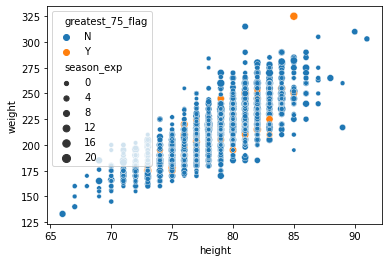

In [5]:
sns.scatterplot(data=player_info, x="height", y="weight", hue="greatest_75_flag", size="season_exp")

<AxesSubplot:xlabel='height', ylabel='Count'>

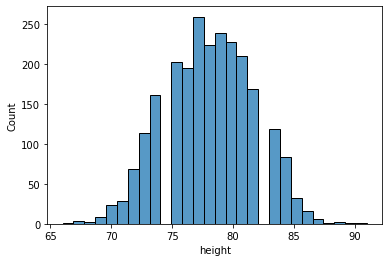

In [6]:
sns.histplot(data = player_info, x="height")

In [7]:
player_info

,Unnamed: 0,person_id,display_first_last,height,weight,season_exp,greatest_75_flag,field_goals_made,field_goals_ast,field_goals_missed,...,games_played,field_goals_made_per_game,field_goals_ast_per_game,field_goals_missed_per_game,free_throws_made_per_game,free_throws_missed_per_game,times_ball_lost_per_game,times_ball_stolen_per_game,rebounds_per_game,fouls_per_game
0,1045,3,Grant Long,81.0,240.0,16.0,N,708,178,915,...,359,1.972145,0.495822,2.548747,1.520891,0.515320,1.002786,0.423398,3.991643,2.144847
1,2025,9,Sedale Threatt,74.0,185.0,14.0,N,28,30,46,...,33,0.848485,0.909091,1.393939,0.181818,0.060606,0.393939,0.181818,0.727273,0.878788
2,899,12,Chris King,80.0,215.0,3.0,N,1,1,4,...,22,0.045455,0.045455,0.181818,0.000000,0.181818,0.136364,0.000000,0.409091,0.272727
3,1470,15,Eric Piatkowski,79.0,215.0,15.0,N,1647,332,2166,...,611,2.695581,0.543372,3.545008,1.261866,0.225859,0.808511,0.289689,2.315876,1.445172
4,34,21,Greg Anthony,73.0,180.0,11.0,N,887,587,1324,...,403,2.200993,1.456576,3.285360,1.014888,0.419355,1.218362,0.523573,1.669975,1.535980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2253,1631298,Jack White,79.0,225.0,0.0,N,7,2,9,...,11,0.636364,0.181818,0.818182,0.181818,0.090909,0.090909,0.090909,0.727273,0.545455
2392,1936,1631306,Cole Swider,81.0,220.0,0.0,N,3,0,6,...,5,0.600000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,1.400000,0.600000
2393,679,1631309,Trevor Hudgins,72.0,180.0,0.0,N,2,0,7,...,4,0.500000,0.000000,1.750000,0.750000,0.000000,0.250000,0.000000,0.000000,0.250000
2394,1264,1631320,Chima Moneke,77.0,223.0,0.0,N,1,1,1,...,2,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [8]:
temp = player_info.drop(['person_id', 'display_first_last', 'greatest_75_flag', 'Unnamed: 0'], axis = 1)

<AxesSubplot:>

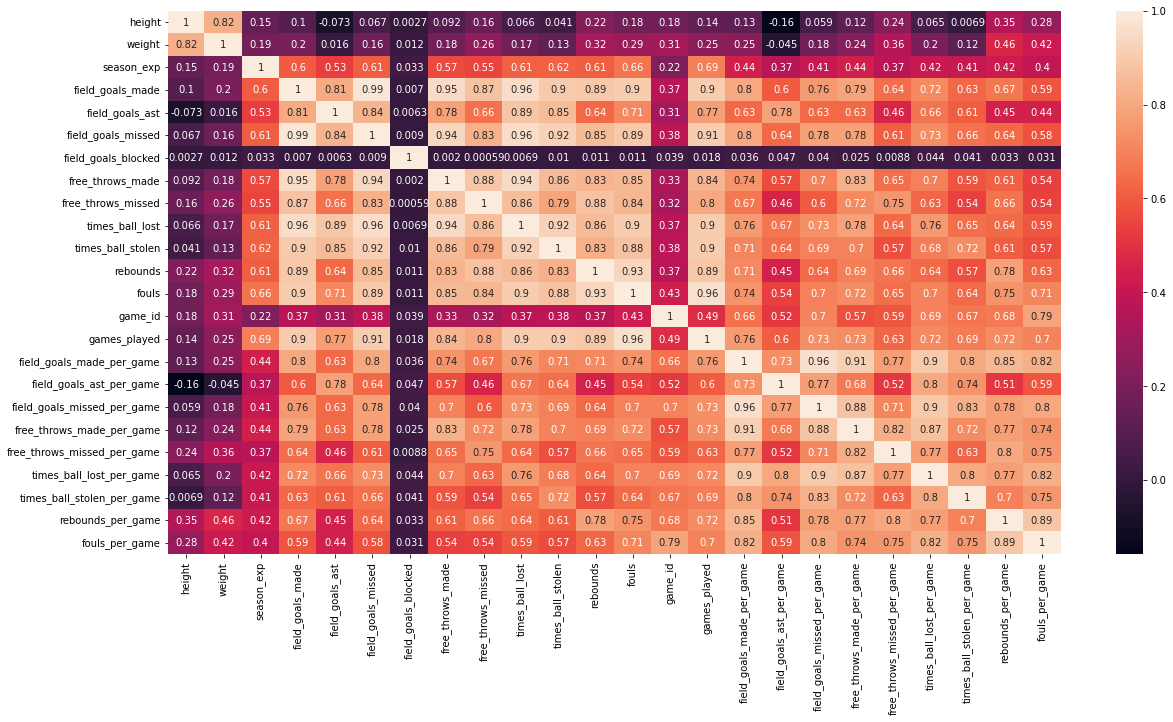

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(temp.corr(), annot=True, ax=ax)

In [10]:
temp = player_info.sort_values(by = ["fouls_per_game"], ascending = False).head(10)

<AxesSubplot:xlabel='rebounds_per_game', ylabel='Count'>

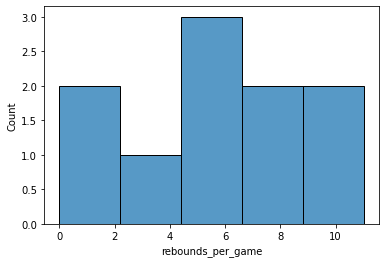

In [11]:
sns.histplot(temp, x = 'rebounds_per_game')

<AxesSubplot:xlabel='height', ylabel='Count'>

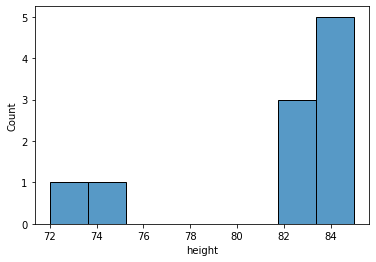

In [12]:
sns.histplot(temp, x = 'height')

<AxesSubplot:xlabel='season_exp', ylabel='Count'>

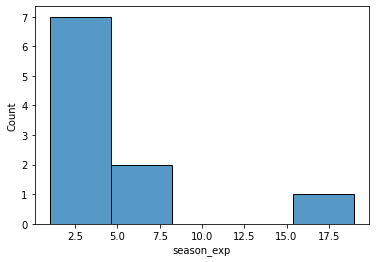

In [13]:
sns.histplot(temp, x = 'season_exp')